<a href="https://colab.research.google.com/github/klajosw/python/blob/master/kl_py_TF_Day_1_Intro_to_ML_and_TF_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![TF](https://1.bp.blogspot.com/-eb-_3Aqu5bA/XnertoOpPgI/AAAAAAAAa6Y/8TPaJ8vjn2cN_so7xLeqPZDqX3pQjVARgCLcBGAsYHQ/s200/tf.jpg)

## Machine Learning Intro

Before getting started, active GPU support: **Runtime** -> **Change runtime type**
  - Set Handware Accelerator to **GPU**

## Using Data to Answer Questions

Machine Learning is a branch of AI devoted to developing systems that learn from data.

Types of Machine Learning tasks:

- Supervised learning
- Unsupervised learning
- Reinforcement learning


We are going to focus on **Supervised learning**. 

A supervised learning setup is like learning any concept with a teacher (supervisor) by your side.

In this context, supervised datasets are composed of input features and the correspondings labels. The **true values** for each record.



# Gradient Descent

### Gradient Descent is an optimization algorithm.

**Optimization algorithms** (Basic definition): Finding a value that minimizes or maximizes a function f(x) by changing x.

Imagine you are on top of a hill and you want to get to its **lowest spot**.

Some key observatons:

- You do not have a map of the mountain. So you do **NOT** know where the sweet spot you are looking for is.
- What if you know the direction that brings your there?

![alt text](https://cdn-images-1.medium.com/max/800/1*QEME_QUKOjntJpBBUdgTNA.png)

- The Gradient points to the direction of steepest ascent.
- The Gradient is a **vector** os partial derivatives.

Each gradient value tells how much a function change if we slightly alter one of its parameters.

![alt text](https://cdn-images-1.medium.com/max/800/1*J-TbI94E1nXNHIubJc7VeQ.png)

[Intro do Gradient Descent](https://towardsdatascience.com/machine-learning-101-an-intuitive-introduction-to-gradient-descent-366b77b52645)


# Learning Rate

There are various knobs that we can change in order to optimize our ML models. 

- Batch size
- Regularization strength
- Learning rate

We call these knobs** Hyper-parameters**.

The **Learning Rate** is one of these knobs. Perharps, the most important one.

![alt text](https://cdn-images-1.medium.com/max/1600/0*uIa_Dz3czXO5iWyI.)

The learning rate controls the rate of learning of your ML algorithm. 

In math terms, the learning rate is a scalar that we **multiply by the Gradient vector**. 
  - It controls how much of the Gradient Signal, we are going to follow at each step.
  
Let's see it in action: [Learning Rate Playground](https://developers.google.com/machine-learning/crash-course/fitter/graph)

# TensorFlow Intro



Tensorflow is a plataform to build Machine Learning algorithms.

More generally, it is a** Graph based computation** framework.
  - It can be used to create any kind of computation (as long as it can be interpreted as a graph)

## Tensors and Ranks

- In TensorFlow, the Tensor is the central unit of data.
- The **Rank** is the Tensor number of dimensions. 

![Tensors](https://image.slidesharecdn.com/tensordecomposition-170301235239/95/a-brief-survey-of-tensors-3-638.jpg?cb=1488412458)


**Take away: The Rank of a Tensor is its number of Dimentions.**

In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf

# create different tensors
scalar = tf.constant(3.) # just a value
one_d_array = tf.constant([4., 5.5, 3]) # a simple 1-D array
two_d_array = tf.constant([[2., 3.4],[8.,1.0],[2.3,7.5]]) # a matrix like object 2-D
tensor = tf.constant([[[3.0,9.3]], [[4.3,7.7]]]) # any representation with more than 2 dimentions

# Look at the shapes. These are called the Ranks
print(scalar)
print(one_d_array)
print(two_d_array)
print(tensor)

Tensor("Const:0", shape=(), dtype=float32)
Tensor("Const_1:0", shape=(3,), dtype=float32)
Tensor("Const_2:0", shape=(3, 2), dtype=float32)
Tensor("Const_3:0", shape=(2, 1, 2), dtype=float32)


## Graph Execution

You might think of TensorFlow Core programs as consisting of two discrete sections:

1.   Building the computational graph.
2.   Running the computational graph.

A Tensorflow graph is a series of operations that are structured as a Graph.
​
A TF Graph contains two types of objects.
  - Operations
  - Tensors
  
## Operations
In a Tensorflow computation graph. **The nodes represent Operations**. E.g. Matmul, add, sub...

It consumes and produces **Tensors** by the means of math operations. 
  
## Tensors

Similarly, the **edges** of a TensorFlow graph represent Tensors. 

Tensors are the inputs and outputs of operations.

That is, **Tensors** are the kind of information that flows through a TF Graph.

![alt text](https://github.com/sthalles/tensorflow-tutorials/blob/master/images/sample_graph.png?raw=true)

Note: When we create tensors using Graph execution, these objects are actually **references** to the nodes in the Graph.

## Exercise

- Use [tf.constant()](https://www.tensorflow.org/versions/master/api_docs/python/tf/constant) to build a simple computational graph. Try *y = a + b*. 
- Print the result of the tensors. What do you see?

In [0]:
# Creates a constant tensor.
# tf.constant(
#     value, # A constant value (or list) of output type dtype.
#     dtype=None, # The type of the elements of the resulting tensor.
#     shape=None, # Optional dimensions of resulting tensor.
#     name='Const', # Optional name for the tensor.
#     verify_shape=False # Boolean that enables verification of a shape of values.
# )

a = tf.constant(2.0)
b = tf.constant(3.0, dtype=tf.float32) # you can also define the type values
y = a + b

## Session

To run a TensorFlow graph and get the results from the operations, we need a **Session()**.

- **Session is responsible for evaluating a computational Graph**.
- The *run()* method runs the necessary nodes to evaluate a given operation.

In [0]:
with tf.Session() as sess:
  y_ = sess.run(y) # print out the actual result of the computational graph we built above
  print("a + b =", y_)
  
  # we can pass as many tensors to run as we wish
  a_,b_,y_ = sess.run([a,b,y])
  print("a=%d, b=%d, y=%d" % (a_,b_,y_))

a + b = 5.0
a=2, b=3, y=5


When we execute **Session().run()**, Tensorflow backtracks through all **dependent** operations of the running node.

## Try it yourself

Create a TensorFlow graph for the following operations.

![alt text](https://www.tensorflow.org/versions/r1.1/images/getting_started_add.png)

In [0]:
node1 = tf.constant(3.0)
node2 = tf.constant(2.0)
node3 = tf.add(node1, node2)
print("node3: ", node3)

with tf.Session() as sess:
  print("sess.run(node3): ",sess.run(node3))

node3:  Tensor("Add_1:0", shape=(), dtype=float32)
sess.run(node3):  5.0


## Placeholders

What if we want to pass different values (from outside Tensorflow) to a computational Graph?

To do that, Tensorflow provides a special kind of Tensor - the [tf.placeholder()](https://www.tensorflow.org/api_docs/python/tf/placeholder).

A placeholder acts as a promise. 
**It promises to deliver the value assigned to it when its value is requested**.

To dynamically feed values to a Tensorflow graph using placeholders, we use the **feed_dict** argument of the **run()** method.

Note that the feed_dict can **overwrite any tensor**, not just placeholders.

## Exercise
- Use [tf.placeholder()](https://www.tensorflow.org/api_docs/python/tf/placeholder) to finish the new version of the computational graph below. Try y = a + b.
- Try to feed different values to the placeholder. Try to break it. 

In [0]:
a = tf.placeholder(dtype=tf.float32)
b = tf.placeholder(dtype=tf.float32)
y = a + b

with tf.Session() as sess:
  print(sess.run(y, feed_dict={a: 10, b:2}))
  print(sess.run(y, feed_dict={a: [1, 3], b: [2, 4]}))

12.0
[3. 7.]


## Variables

In Machine Learning, we usually need to modify the internal structure of a Graph (its variables) in order to get new (improved) outputs with the same inputs.

- [tf.Variable()](https://www.tensorflow.org/api_docs/python/tf/Variable) gives us this possibility.
- After creating a **tf.Variable**, its type and shape are Immutable. But its values can be changed.
- Variables must be **initialized** before used by any operation.

In [0]:
var1 = tf.Variable(1.2, name="my_first_variable")

# Assign a new value to the variable with `assign()` or a related method.
# op = var1.assign(var1 + 1.0)
op = var1.assign_add(1.0)

with tf.Session() as sess:
  sess.run(var1.initializer) # initialize the variable before running it
  print("Value:", sess.run(var1))
  print("Value after mutation:", sess.run(op))

Value: 1.2
Value after mutation: 2.2


## Tensorboard

[TensorBoard](https://www.tensorflow.org/programmers_guide/summaries_and_tensorboard) is a Tensorflow utility that provides ways of visualizing learning. Some of the functionalities include:
1. Model's weights visualization
2. Hyperparameters inspection
3. Tensorflow Graph inspection

[TensorFlow summit talk](https://www.youtube.com/watch?v=eBbEDRsCmv4)

## Tensorflow APIs

TensorFlow provides multiple APIs. 

- The lowest level API --**TensorFlow Core**-- provides you with complete programming control.
- The higher level APIs are built on top of TensorFlow Core
  - Easier to use.
  - Less internal control
  
Let's run a complete example using the **Tensorflow Core** API

# Linear Regression

Let's create one of the most basic ML models, The **Linear Regression**.

As the name suggests, is a Regression model (predicts a real value) by finding the best line that fits the data.

## Loading data

In [0]:
# updaload the RealEstate dataset
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving RealEstate.csv to RealEstate.csv
User uploaded file "RealEstate.csv" with length 45702 bytes


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We are going to solve the problem of predicting **house prices** based on historical data. 

In [0]:
housing_data = pd.read_csv("RealEstate.csv")
housing_data.head()

,MLS,Location,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft,Status
0,132842,Arroyo Grande,795000.0,3,3,2371,335.30,Short Sale
1,134364,Paso Robles,399000.0,4,3,2818,141.59,Short Sale
2,135141,Paso Robles,545000.0,4,3,3032,179.75,Short Sale
3,135712,Morro Bay,909000.0,4,4,3540,256.78,Short Sale
4,136282,Santa Maria-Orcutt,109900.0,3,1,1249,87.99,Short Sale


To build a Machine Learning model, we often need at least 3 things. A **problem T**, a performance **measure P**, and an **experience E**, from where our model will learn patterns from.

- Take a look at the statistics bellow.

In [0]:
housing_data.describe()

,MLS,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft
count,781.000000,7.810000e+02,781.000000,781.000000,781.000000,781.000000
mean,151224.550576,3.833291e+05,3.142125,2.355954,1755.058899,213.131293
std,3936.122042,3.490381e+05,0.855768,0.846596,819.577603,115.082146
min,132842.000000,2.650000e+04,0.000000,1.000000,120.000000,19.330000
25%,149922.000000,1.990000e+05,3.000000,2.000000,1218.000000,142.140000
50%,152581.000000,2.950000e+05,3.000000,2.000000,1550.000000,188.360000
75%,154167.000000,4.290000e+05,4.000000,3.000000,2032.000000,245.420000
max,154580.000000,5.499000e+06,10.000000,11.000000,6800.000000,1144.640000


## Visualizing data

Size shape: (781, 1)
Price shape: (781, 1)
Size: 781


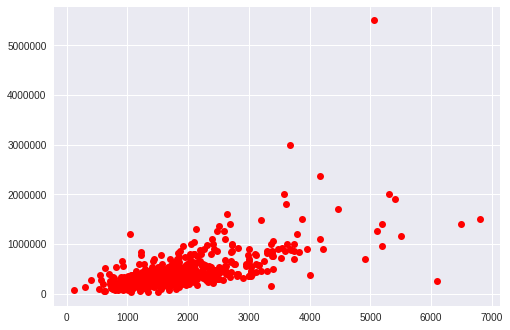

In [0]:
# only get the Size and the Price features
Xs = housing_data[['Size']]
Ys = housing_data[['Price']]
print("Size shape:", Xs.shape)
print("Price shape:", Ys.shape)
dataset_size = Xs.shape[0]
print("Size:", dataset_size)

# plot the price and the size
plt.plot(Xs, Ys, 'ro')

## Normalization

Normalization helps the Learning algorithm in many aspects. 
- Prevents some attributes to outvalue some other
- Decreases numerical error
- Accelerates learning

## Mean Standardization

- Center the data by removing the mean, and scale it by dividing to the standard deviation.

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/b0aa2e7d203db1526c577192f2d9102b718eafd5)

## MinMax Scaling
- Scale the data values to the [0-1] interval.

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/358923abc154221bb5022fc329061f6fc4dcc69f)

Tips: Use **np.max()**, **np.min()**, **np.mean()** and **np.std()**

In [0]:
Xs = Xs.values
Ys = Ys.values

# Normalize the input features
max_size = np.max(Xs)
min_size = np.min(Xs)
max_price = np.max(Ys)
min_price = np.min(Ys)

Xs = (Xs - min_size) / (max_size - min_size)
Ys = (Ys - min_price) / (max_price - min_price)

# shuffle the dataset before separating test/train sets
p = np.random.permutation(len(Xs))
Xs = Xs[p]
Ys = Ys[p]

## Cross validation

**Cross-validation allows us to be more confident about how good our model is**.

We want to measure how our models will generalize when faced with unseen data.

There are many kinds of cross-validation techniques.

![alt text](https://github.com/sthalles/tensorflow-tutorials/blob/master/images/cross_val_1.png?raw=true)

Can you see any problems with that?

![alt text](https://github.com/sthalles/tensorflow-tutorials/blob/master/images/cross_val_2.png?raw=true)

What happens if the results of on the validation data are quite different from the testing data?

Let's stick with the basics. 
- Separates a subset for training and testing.




In [0]:
# separate train/test sets 
# Use 80% for training and 20% for testing
train_size = int(0.8 * dataset_size)
Xs_train = Xs[0:train_size]
Xs_test = Xs[train_size:]
Ys_train = Ys[0:train_size]
Ys_test = Ys[train_size:]
print("Training set:", Xs_train.shape )
print("Training set labels:", Ys_train.shape )
print("Testing set:", Xs_test.shape )
print("Testing set labels:", Ys_test.shape )



Training set: (624, 1)
Training set labels: (624, 1)
Testing set: (157, 1)
Testing set labels: (157, 1)


Text(0,0.5,'Price')

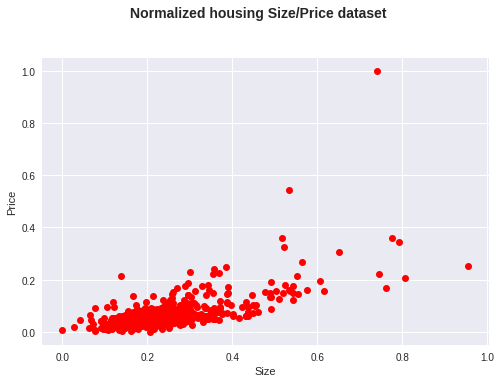

In [0]:

min_x = np.min(Xs_test)
max_x = np.max(Xs_test)

# plot the price and the size
fig = plt.figure()
fig.suptitle('Normalized housing Size/Price dataset', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.plot(Xs_train, Ys_train, 'ro')
ax.set_xlabel('Size')
ax.set_ylabel('Price')

## Placeholders and Variables

## Exercise:

1. Use [tf.placeholder()](https://www.tensorflow.org/api_docs/python/tf/placeholder) to build the two placeholders necessary for feeding the housing data into the Tensorflow Model.
2. Use [tf.Variable()](https://www.tensorflow.org/api_docs/python/tf/Variable) to create the two necessary variables for a Linear Model - *Hint: slope and y-intercept*

**Template**: 
- *inputs = tf.placeholder(shape=[...], dtype=tf.float32, name="tensor_name")*
- *slope = tf.Variable({initial-value}, name={optional-name})*



In [0]:
inputs = tf.placeholder(shape=[None,1], dtype=tf.float32, name="inputs")
labels = tf.placeholder(dtype=tf.float32, name="labels")
print(inputs)
print(labels)

Tensor("inputs_1:0", shape=(?, 1), dtype=float32)
Tensor("labels_1:0", dtype=float32)


In [0]:
# create the training variables for the y_intercept and slope of the linear function

# Pay special attention to the Tensor shapes
y_intercept = tf.Variable(tf.random_normal(shape=[1], mean=0, stddev=0.02), name="y-intercept")
slope = tf.Variable(tf.random_normal(shape=[1,1], mean=0, stddev=0.02), name="slope")
print(y_intercept)
print(slope)

<tf.Variable 'y-intercept_1:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'slope_1:0' shape=(1, 1) dtype=float32_ref>


## Building the Model

## Exercise

1- Build a linear model following the equation bellow.

**Hint: Think about how a computational graph for the linear equation would look like.**

![alt text](https://cdn-images-1.medium.com/max/800/1*SuNmDkv0qNJbKGZoEoGBmw.png)

For Matrix multiplication: [tf.matmul()](https://www.tensorflow.org/api_docs/python/tf/matmul)

In [0]:
def model(X):
  # create the graph model here, and return it
  return tf.matmul(X,slope) + y_intercept
predictions = model(inputs)

## Hyper-parameters

## Exercise:
1. Tune the hyper-parameters

In [0]:

lr = 0.3 # defines the size of the step we want to perform in the direction of the gradient define 
batch_size = 96 # number of examples that we will use to calculate the gradients at each time step 
total_epochs = 25 # number of complete passes through the dataset 

## Error Function

![alt text](https://cdn-images-1.medium.com/max/800/1*GQ6vjZ9j0K5V7BReHywWAA.png)

### Loss Function and Convex Optimization

- The **loss function**, also called the objective, is a method for evaluating how good our model is. 
- Remember, the goal is to make the **generalization loss** as low as possible.
- The optimization function is responsible for minimizing the loss. It does it using **Gradient Descent**. 
- Basically, at each time step, it computes the Gradient of the loss function (MSE) with respect to the Weights (slope and bias) and then it takes a step in the opposite direction of this gradient.

**DO NOT** worry with gradients - TensorFlow handles it for you :)

In Practice:

![alt text](http://res.cloudinary.com/dyy3xzfqh/image/upload/v1511673179/QQ%E6%88%AA%E5%9B%BE20171126131248_muwkba.png)

## Exercise:

1. Use [tf.losses.mean_squared_error()](https://www.tensorflow.org/api_docs/python/tf/losses/mean_squared_error) to compute the loss between the prediction values and the true (target) values.
2. Use [tf.train.GradientDescentOptimizer()](https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer) to compute the Gradients and minimize the loss function.

In [0]:
# create the loss function here. It need to receive the labels and the predictions from the model
loss = tf.losses.mean_squared_error(
    labels=labels,
    predictions=predictions)

# Set the Gradient Descent optimizer and use the minimize() function to minimize the loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(loss)

In [0]:
## DO NOT CHANGE
def next_batch(Xs, Ys, batch_size=64):
    p = np.random.permutation(len(Xs))
    Xs = Xs[p]
    Ys = Ys[p]
    for i in range(0,Xs.shape[0],batch_size):
        x_batch = Xs[i:i+batch_size]
        if x_batch.shape[0] < batch_size:
            continue
        yield np.reshape(x_batch, (batch_size,-1)), Ys[i:i+batch_size]

In [0]:
## DO NOT CHANGE
def eval_and_plot(W0, W1, min_x, max_x):
    min_y = W0 + np.dot(W1, min_x)
    max_y = W0 + np.dot(W1, max_x)

    plt.plot(Xs_test, Ys_test, 'ro')
    plt.plot([min_x, max_x], [min_y.squeeze(), max_y.squeeze()], 'k-', lw=2)
    #plt.savefig("./media/fit%(number)04d.png" % {"number": id_})
    #plt.clf()
    plt.show()

## Exercise:


1.   Finish the training loop bellow. Make sure you run the *optimizer* Tensor.
2.   Fetch and display the *training* and *generalization* losses.

Tips: Use the Session object to run the TF Graph. 

**Template:** 

*sess.run("tensor1, tensor2...",  feed_dict={inputs: "python var", labels: "python var"})*


Epoch: 0 Generalization error: 0.003373503
Epoch: 1 Generalization error: 0.0033908547
Epoch: 2 Generalization error: 0.0031347417
Epoch: 3 Generalization error: 0.0029506658
Epoch: 4 Generalization error: 0.0028681594
Epoch: 5 Generalization error: 0.0027268634
Epoch: 6 Generalization error: 0.002658567
Epoch: 7 Generalization error: 0.0025818124
Epoch: 8 Generalization error: 0.0025076296
Epoch: 9 Generalization error: 0.002445568
Epoch: 10 Generalization error: 0.0024022933
Epoch: 11 Generalization error: 0.0023721373
Epoch: 12 Generalization error: 0.0023220603
Epoch: 13 Generalization error: 0.0022678894
Epoch: 14 Generalization error: 0.0022409824
Epoch: 15 Generalization error: 0.0022144038
Epoch: 16 Generalization error: 0.002190112
Epoch: 17 Generalization error: 0.0021960097
Epoch: 18 Generalization error: 0.0021574877
Epoch: 19 Generalization error: 0.0021513787
Epoch: 20 Generalization error: 0.002142476
Epoch: 21 Generalization error: 0.0021658572
Epoch: 22 Generalization 

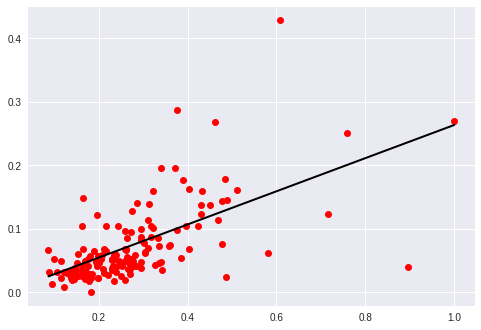

In [0]:
training_loss = []
generalization_loss =[]

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  
  for epoch in range(total_epochs):
  
    for X_batch, y_batch in next_batch(Xs_train, Ys_train, batch_size):
      _, train_loss = sess.run([optimizer, loss], 
                            feed_dict={inputs:X_batch, labels:y_batch})
    training_loss.append(train_loss)
    val_pred, val_loss, m, y = sess.run([predictions, loss, slope, y_intercept], 
                                  feed_dict={inputs: Xs_test, labels:Ys_test})
    
    generalization_loss.append(val_loss)
    print("Epoch:", epoch, "Generalization error:", val_loss)
    
eval_and_plot(y,m,min_x,max_x)

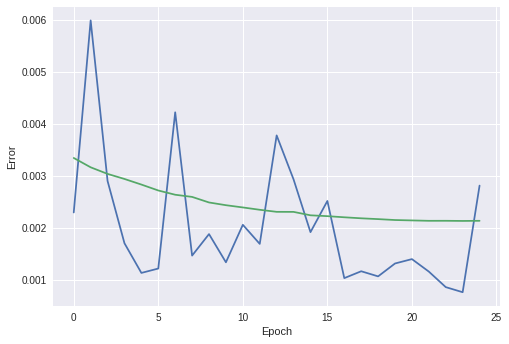

In [0]:
# plot the price and the size
plt.plot(training_loss, label="validation")
plt.plot(generalization_loss, label="training")
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()